In [6]:
import spinfoam as sf
import multiprocessing

In [7]:
sf.spinfoam_clean()

rm -rf obj
rm -rf lib
rm -rf bin


In [2]:
sf.spinfoam_compile()

make: Nessuna operazione da eseguire per «default».


In [10]:
draws_path = "./data_folder/collected_draws"
hash_tables_path = "./data_folder/hashed_21j"
spin = 0.5
length = 1000000 
sigma = 0.4
burnin = 50 
verbosity = 0 
number_of_threads = int(multiprocessing.cpu_count()/2)

In [4]:
number_of_threads

6

In [12]:
sf.Metropolis_Hastings_multithread_run(draws_path, spin, length, sigma, burnin, verbosity, number_of_threads)

Starting run from thread 1...
Starting run from thread 2...
Starting run from thread 3...
Starting run from thread 4...
Starting run from thread 5...
Starting run from thread 6...
All threads completed the run...


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd


sns.set()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})

#---- This allows the use of LaTeX + the use sans-serif fonts also for tick labels:

rc('text', usetex=True)
#rc('text.latex', preamble=r'\usepackage{cmbright}')

# There are 5 presents for background: darkgrid, whitegrid, dark, white, and ticks
# Define how ticks are placed and define font families

sns.set_style("ticks")
sns.set_style("whitegrid", 
 {'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'grid.color': '0.9',
 'grid.linestyle': '-',
 'xtick.direction': 'in', 
 'ytick.direction': 'in',
 'xtick.bottom': True,
 'xtick.top': True,
 'ytick.left': True,
 'ytick.right': True, 
 'font.family': ['sans-serif'],
 'font.sans-serif': [
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],})

In [17]:
size_hash_tables_in_MB = [12.8e-03, 409.5e-03, 6.55, 52.42, 209.71, 838.86, 3.35e+03, 6.71e+03]

corresponding_spin = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

df = pd.DataFrame({
   "size" : size_hash_tables_in_MB,
   "spin" : corresponding_spin,
    })

In [42]:
df.spin

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
6    3.5
7    4.0
Name: spin, dtype: float64

In [10]:
size_hash_tables_in_MB

[0.0128, 0.4095, 6.55, 52.42, 209.71, 838.86, 3350.0, 6710.0]

Text(0.5, 1.0, 'Hash table size')

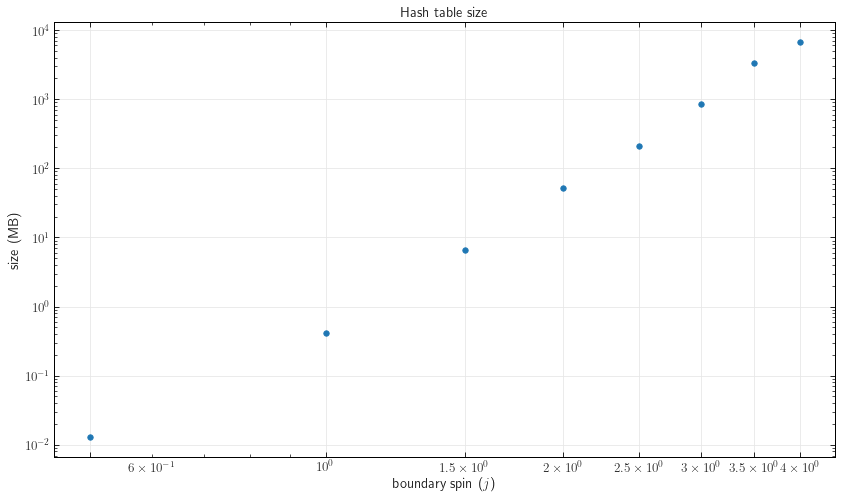

In [45]:
ax = df.plot(x='spin',y='size', s=30, xticks = df.spin, 
             kind='scatter', grid='false', color='tab:blue', 
             logy=True, logx=True, figsize=(14,8))

plt.ylabel("size (MB)")
plt.xlabel("boundary spin ($ j $)")
#plt.legend(loc='upper left')

plt.title('Hash table size')

In [75]:
import numpy as np
logx = np.log(corresponding_spin)
logy = np.log(size_hash_tables_in_MB)
coeffs = np.polyfit(logx,logy,1)
poly = np.poly1d(coeffs)

In [76]:
yfit = lambda corresponding_spin: np.exp(poly(np.log(corresponding_spin)))

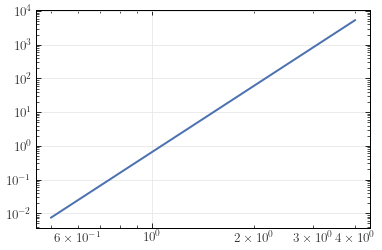

In [77]:
plt.loglog(corresponding_spin, yfit(corresponding_spin))

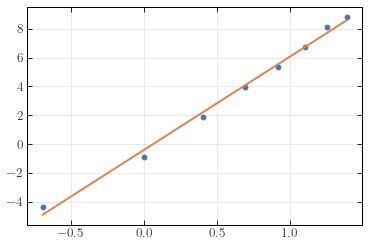

In [78]:
m, b = np. polyfit(logx, logy, 1) #m = slope, b = intercept.
plt.plot(logx, logy, 'o') #create scatter plot.
plt.plot(logx, m*logx + b) #add line of best fit.

In [ ]:
sf.Hashing_21j_symbols(hash_tables_path, 2)

In [ ]:
import threading
from time import sleep

In [ ]:
def task(id):
    print(f'Starting the task {id}...')
    sleep(1)
    print('done')

In [37]:
threads = []

for n in range(1, 11):
    t = threading.Thread(target=task, args=(n,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()    

Starting the task 1...
Starting the task 2...
Starting the task 3...
Starting the task 4...
Starting the task 5...
Starting the task 6...
Starting the task 7...
Starting the task 8...
Starting the task 9...
Starting the task 10...
done
done
done
done
done
done
done
done
done
done


In [ ]:
from ctypes import *

so_file = "/home/frisus95/Scrivania/Final_project/lib/libshared.so"
my_functions = CDLL(so_file)

In [9]:
my_functions._Z6MH_runPcS_iidii(
    b"/home/frisus95/Scrivania/Final_project/data_folder",
    b"/home/frisus95/Scrivania/Final_project/data_folder/hashed_21j", 1,
    100000, c_double(0.4), 10, 0)


done. Time elapsed: 0.215507 seconds.
33%% of draws have been accepted
chain with dspin 1 destroyed


In [28]:
my_functions._Z5funzav(c_double(3.14))


done. Time elapsed: 0.002927 seconds.
39%% of draws have been accepted


0

chain with dspin 2 destroyed


In [22]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv(
    "/home/frisus95/Scrivania/Final_project/data_folder/collected_draws/j_1/N_1000000__sigma_0.4__burnin_100.csv"
)


In [16]:
df

,intertwiner 1,intertwiner 2,intertwiner 3,intertwiner 4,intertwiner 5,intertwiner 6,intertwiner 7,intertwiner 8,intertwiner 9,intertwiner 10,intertwiner 11,intertwiner 12,intertwiner 13,intertwiner 14,intertwiner 15,intertwiner 16,draw molteplicity,draw amplitude
0,2,0,2,2,1,0,1,0,2,2,0,1,0,2,0,1,4,-2.063960e-07
1,2,0,2,2,1,0,1,0,2,1,0,1,0,2,0,2,3,1.831690e-07
2,1,0,2,2,0,0,1,0,2,0,0,1,1,2,0,2,1,-2.307580e-07
3,1,0,2,2,1,0,1,1,2,0,0,2,1,2,0,2,5,1.127080e-06
4,1,0,2,2,0,0,1,1,2,0,0,2,1,2,0,2,2,1.047860e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201124,2,1,2,1,1,0,1,2,0,0,2,0,0,0,2,2,3,-1.070200e-07
201125,2,1,1,1,1,0,1,2,0,1,2,0,0,0,2,2,1,4.141810e-08
201126,2,2,1,2,0,1,1,2,0,1,2,1,1,0,2,2,8,1.672260e-07
201127,2,2,1,2,0,1,0,2,0,1,2,1,1,1,1,2,2,-2.038570e-07


In [ ]:
for i, j in df.iterrows():
    print(i, j)
    print()

In [17]:
total_rows = len(df)

In [18]:
columns = list(df)

In [19]:
columns

['intertwiner 1',
 'intertwiner 2',
 'intertwiner 3',
 'intertwiner 4',
 'intertwiner 5',
 'intertwiner 6',
 'intertwiner 7',
 'intertwiner 8',
 'intertwiner 9',
 'intertwiner 10',
 'intertwiner 11',
 'intertwiner 12',
 'intertwiner 13',
 'intertwiner 14',
 'intertwiner 15',
 'intertwiner 16',
 'draw molteplicity ',
 'draw amplitude']

In [20]:
for i in columns:

    # printing the third element of the column
    print(df[i][1])


2
0
2
2
1
0
1
0
2
1
0
1
0
2
0
2
3
1.83169e-07


In [21]:
df['intertwiner 1'][100]

0

In [24]:
angle = 0.0

for i in range(total_rows):
    angle += (((df['intertwiner 1'][i]) *
               (df['intertwiner 1'][i] + 1) - 2 * 1 * (1 + 1)) /
              (2 * 1 * (1 + 1))) * df['draw molteplicity '][i]


In [25]:
angle / (1000000 - 100)


-0.3313526352635264